In [1]:
from subprocess import check_output
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [2]:
num_classes = 10
epochs = 20

In [3]:
train_df = pd.read_csv('C:/Users/ALKODS/Desktop/CNN/fashion-mnist_train.csv',sep=',')

In [4]:
test_df = pd.read_csv('C:/Users/ALKODS/Desktop/CNN/fashion-mnist_test.csv', sep = ',')

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [8]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [9]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

In [93]:
x_train.shape

(48000, 28, 28, 1)

In [94]:
x_validate.shape

(12000, 28, 28, 1)

In [95]:
x_test.shape

(10000, 28, 28, 1)

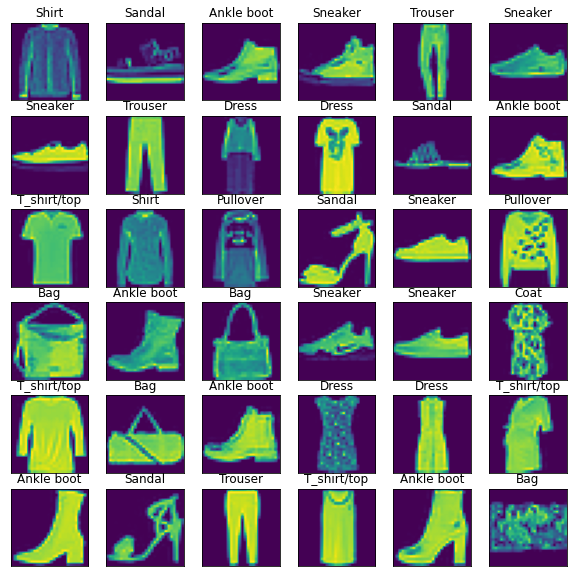

In [10]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [11]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [12]:
print(*image_shape)

28 28 1


In [15]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [26]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 13*13
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

In [28]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                173088    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                      

In [29]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [30]:
cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/75
12/12 [==============================] - 21s 2s/step - loss: 1.7950 - accuracy: 0.4468 - val_loss: 1.1721 - val_accuracy: 0.6819
Epoch 2/75
12/12 [==============================] - 24s 2s/step - loss: 0.9120 - accuracy: 0.7245 - val_loss: 0.7090 - val_accuracy: 0.7619
Epoch 3/75
12/12 [==============================] - 17s 1s/step - loss: 0.6564 - accuracy: 0.7700 - val_loss: 0.6131 - val_accuracy: 0.7819
Epoch 4/75
12/12 [==============================] - 18s 2s/step - loss: 0.5845 - accuracy: 0.7908 - val_loss: 0.5520 - val_accuracy: 0.8041
Epoch 5/75
12/12 [==============================] - 17s 1s/step - loss: 0.5367 - accuracy: 0.8108 - val_loss: 0.5112 - val_accuracy: 0.8198
Epoch 6/75
12/12 [==============================] - 16s 1s/step - loss: 0.5021 - accuracy: 0.8242 - val_loss: 0.4841 - val_accuracy: 0.8331
Epoch 7/75
12/12 [==============================] - 17s 1s/step - loss: 0.4759 - accuracy: 0.8326 - val_loss: 0.4603 - val_accuracy: 0.8383
Epoch 8/75
12/12 [==

In [35]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Accuracy : {:.5f}'.format(score[1]))

Test Accuracy : 0.91230


In [76]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

In [74]:
predict=cnn_model.predict(x_test) 
classes=np.argmax(predict,axis=1)

313/313 [==============================] - 1s 4ms/step


In [75]:
classes

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

In [83]:
classes= np.float32(classes)

In [84]:
classes

array([0., 1., 6., ..., 8., 8., 1.], dtype=float32)

In [98]:
y_true = test_df.iloc[:, 0]
correct = np.nonzero(classes==y_true)[0]
incorrect = np.nonzero(classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.84      0.85      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.86      0.86      0.86      1000
     Class 3       0.92      0.93      0.92      1000
     Class 4       0.88      0.86      0.87      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.73      0.77      0.75      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [44]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

In [91]:
cm = confusion_matrix(y_test, classes)

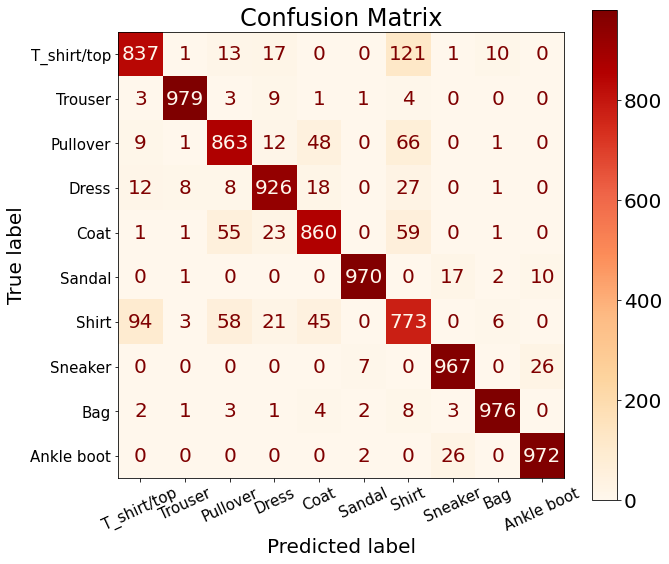

In [92]:
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(cm, display_labels=class_names)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)


# Showing the plot
plt.show()